In [1]:
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)


In [2]:
df=pd.read_csv(r"C:\Users\palas\Downloads\archive (9)\car_resale_prices.csv")
df

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


In [3]:
df.isnull().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [4]:
df['registered_year'].dtype


dtype('O')

In [5]:
df['registered_year'].nunique()

243

In [6]:
import numpy as np
import pandas as pd

df = df.copy()

# 1️⃣ 4-digit year extract (2011, March 2017 → 2011, 2017)
df.loc[:, 'registered_year'] = (
    df['registered_year']
    .astype(str)
    .str.extract(r'(\d{4})')
)

# 2️⃣ Explicit numeric conversion (MOST IMPORTANT)
df.loc[:, 'registered_year'] = pd.to_numeric(
    df['registered_year'],
    errors='coerce'
)

# 3️⃣ Check if column is empty BEFORE mean/median
if df['registered_year'].notna().sum() == 0:
    # fallback year (domain-wise safe)
    year_fill = 2015
else:
    year_fill = df['registered_year'].median()

# 4️⃣ Fill missing (NO warning now)
#df.loc[:, 'registered_year'] = df['registered_year'].fillna(year_fill)
df['registered_year'] = df['registered_year'].fillna(year_fill)


# 5️⃣ Verify
print(df['registered_year'].dtype)
print(df['registered_year'].isnull().sum())


object
0


In [7]:
df = df.copy()

df.loc[:, 'engine_capacity'] = (
    df['engine_capacity']

    .astype(str)
    .str.lower()
    .str.replace('cc', '', regex=False)
    .str.strip()
)


In [8]:
df['car_age'] = 2025 - df['registered_year']


In [9]:
df['insurance'].nunique()

7

In [10]:
df['insurance'] = df['insurance'].fillna(
    df['insurance'].mode()[0]
)


In [11]:
df['owner_type'].value_counts(dropna=False)


owner_type
First Owner     12293
Second Owner     4150
Third Owner       780
Fourth Owner      127
Fifth Owner        51
NaN                45
Name: count, dtype: int64

In [12]:
df['owner_type'] = df['owner_type'].fillna('Unknown')



In [13]:
df['max_power'] = (
    df['max_power']
    .astype(str)
    .str.replace(' bhp', '', regex=False)
)

df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')




In [14]:
df['max_power'] = df['max_power'].fillna(
    df['max_power'].median()
)


In [15]:
df['seats'] = df['seats'].fillna(
    df['seats'].mode()[0]
)


In [16]:
df['mileage'] = (
    df['mileage']
    .astype(str)
    .str.replace(' kmpl', '', regex=False)
)

df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')


In [17]:
df['mileage'] = df['mileage'].fillna(
    df.groupby('fuel_type')['mileage'].transform('median')
)


In [18]:
df['mileage'] = df['mileage'].fillna(
    df['mileage'].median()
)


In [19]:
df.isnull().sum()

Unnamed: 0           0
full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           3
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
car_age              0
dtype: int64

In [20]:
df['kms_driven'].head(100)


0       40,000 Kms
1       70,000 Kms
2       70,000 Kms
3       70,000 Kms
4       80,000 Kms
          ...     
95      70,000 Kms
96      60,000 Kms
97      60,000 Kms
98    1,00,000 Kms
99    1,20,000 Kms
Name: kms_driven, Length: 100, dtype: object

In [21]:
df[['kms_driven']].head()
df[['kms_driven']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   kms_driven  17443 non-null  object
dtypes: object(1)
memory usage: 136.4+ KB


In [22]:
df['kms_driven'].head()
df['kms_driven'].dtype
df['kms_driven'].isnull().sum()


3

In [23]:
df['kms_driven'] = (
    df['kms_driven']
    .str.replace('[^0-9]', '', regex=True)
)

df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')


In [24]:
df.fillna({'kms_driven': df['kms_driven'].median()}, inplace=True)



In [25]:
df=df.drop(columns='Unnamed: 0')

In [26]:
df['body_type'].unique()

array(['Hatchback', 'MUV', 'Sedan', 'Minivans', 'SUV', 'Toyota', 'Coupe',
       'Chevrolet', 'Mercedes-Benz', 'Audi', 'Maruti', 'Pickup',
       'Porsche', 'Tata', 'Mahindra', 'Volvo', 'Jaguar', 'BMW', 'Cars',
       'Datsun', 'Hyundai', 'Honda', 'Convertibles', 'Wagon', 'Skoda',
       'Isuzu'], dtype=object)

In [27]:
import pandas as pd

# 1) Column name clean (extra space problem solve)
df.columns = df.columns.str.strip()

# 2) Body_type clean (extra space problem solve)
df['body_type'] = df['body_type'].astype(str).str.strip()

# 3) Rare body types (<100) কে 'Other' বানাও
rare_types = df['body_type'].value_counts()
rare_types = rare_types[rare_types < 100].index

df['body_type'] = df['body_type'].replace(rare_types, 'Other')

# 4) One-Hot Encoding
df = pd.get_dummies(df, columns=['body_type'], drop_first=True)


In [28]:
df = pd.get_dummies(df, columns=['insurance'], drop_first=True)



In [29]:
transmission_type_map={'Automatic':1,'Manual':0}
df['transmission_type']=df['transmission_type'].map(transmission_type_map)

In [30]:
owner_map = {
    
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth Owner': 4,
    'Fifth Owner': 5,
    'Unknown':6
}

df['owner_type'] = df['owner_type'].map(owner_map)
df = pd.get_dummies(df, columns=['owner_type'], drop_first=True)


In [31]:
df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)





In [32]:
top_cities = df['city'].value_counts().head(10).index

df['city'] = df['city'].apply(
    lambda x: x if x in top_cities else 'Other'
)

df = pd.get_dummies(df, columns=['city'], drop_first=True)


In [33]:
df.drop(columns=['full_name'], inplace=True)


In [34]:
import pandas as pd
import numpy as np
import re

def clean_price(x):
    if pd.isna(x):
        return np.nan
    
    x = str(x).strip().lower()

    # remove currency and commas
    x = x.replace('₹', '').replace(',', '').strip()

    # keep only numbers + dot + words
    # example: "5.45 lakh", "45 lakh", "1.2 crore"
    if 'lakh' in x:
        num = re.findall(r'[\d.]+', x)
        return float(num[0]) * 100000 if num else np.nan

    if 'crore' in x:
        num = re.findall(r'[\d.]+', x)
        return float(num[0]) * 10000000 if num else np.nan

    # if plain number like "450000"
    num = re.findall(r'[\d.]+', x)
    return float(num[0]) if num else np.nan


In [35]:
df['resale_price'] = df['resale_price'].apply(clean_price)


In [36]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [37]:
df

,resale_price,registered_year,engine_capacity,transmission_type,kms_driven,max_power,seats,mileage,car_age,body_type_MUV,...,city_Bangalore,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Kolkata,city_Mumbai,city_Other,city_Pune
0,545000.0,2015,1197,0,40000.0,100.0,5.0,21.40,10,0,...,0,0,0,0,0,0,0,0,1,0
1,1000000.0,2015,2179,1,70000.0,100.0,7.0,17.60,10,1,...,0,0,0,0,0,0,0,0,1,0
2,450000.0,2015,1197,0,70000.0,100.0,5.0,20.85,10,0,...,0,0,0,0,0,0,0,0,1,0
3,450000.0,2015,1197,0,70000.0,100.0,5.0,20.85,10,0,...,0,0,0,0,0,0,0,0,1,0
4,160000.0,2015,1086,0,80000.0,100.0,5.0,19.81,10,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,325000.0,2015,1198,0,89000.0,100.0,5.0,18.00,10,0,...,0,0,1,0,0,0,0,0,0,0
17442,2075000.0,2015,2494,1,68000.0,100.0,5.0,19.16,10,0,...,0,0,1,0,0,0,0,0,0,0
17443,835000.0,2015,1798,0,81000.0,100.0,5.0,14.28,10,0,...,0,0,1,0,0,0,0,0,0,0
17444,1395000.0,2015,1582,1,20000.0,100.0,5.0,17.01,10,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numeric:", list(num_cols))
print("Categorical:", list(cat_cols))


Numeric: ['resale_price', 'transmission_type', 'kms_driven', 'max_power', 'seats', 'mileage']
Categorical: ['registered_year', 'engine_capacity', 'car_age']


In [39]:
# 1) X, y 
X = df.drop('resale_price', axis=1)
y = df['resale_price']

# 2) Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Scaling (only in X)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Done ✅ Scaling complete!")


Done ✅ Scaling complete!


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import joblib

X = df.drop('resale_price', axis=1)
y = df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        
         max_depth=20,
        min_samples_leaf=2
    ))
])

rf_pipe.fit(X_train, y_train)
print("RF Train R2:", rf_pipe.score(X_train, y_train))
print("RF Test  R2:", rf_pipe.score(X_test, y_test))


# ✅ Save Model
joblib.dump(rf_pipe, "car_resale_rf_model.pkl")
print("✅ Model Saved: car_resale_rf_model.pkl")


RF Train R2: 0.936100288892149
RF Test  R2: 0.8436842272765981
✅ Model Saved: car_resale_rf_model.pkl


In [41]:
loaded_model = joblib.load("car_resale_rf_model.pkl")

pred = loaded_model.predict(X_test.iloc[:5])
print("✅ Sample Predictions:", pred)



✅ Sample Predictions: [ 351567.29758992  376088.66479537  247647.30926008 1194510.16305916
  601692.20190498]


In [42]:
from sklearn.metrics import mean_absolute_error

pred = rf_pipe.predict(X_test)
mae = mean_absolute_error(y_test, pred)

print("MAE:", mae)


MAE: 178596.8708474241


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df.drop('resale_price', axis=1)
y = df['resale_price']

y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

rf_pipe.fit(X_train, y_train)

pred_log = rf_pipe.predict(X_test)

pred = np.expm1(pred_log)
y_true = np.expm1(y_test)

mape = np.mean(np.abs((y_true - pred) / y_true)) * 100
print("MAPE (%):", mape)


MAPE (%): 21.209125212121894


In [44]:
df.to_csv("cleaned_data.csv", index=False)
print("Saved ✅ cleaned_data.csv")


Saved ✅ cleaned_data.csv


In [45]:
import os
print(os.getcwd())


C:\Users\palas\DATA CLEANING\practice


In [46]:
os.getcwd()

'C:\\Users\\palas\\DATA CLEANING\\practice'

In [48]:
#### visualization of data



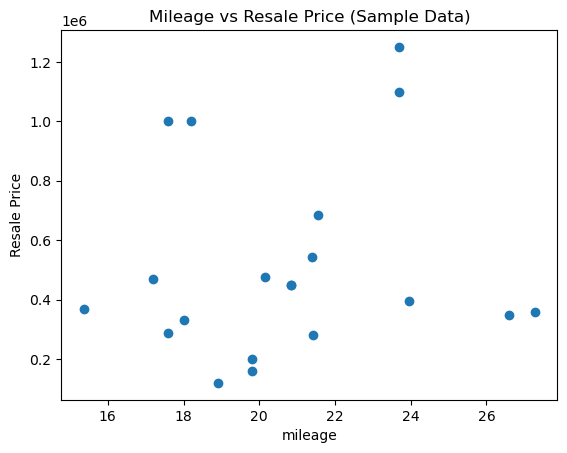

In [51]:
sample_df = df.head(20)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(sample_df['mileage'], sample_df['resale_price'])
plt.xlabel("mileage")
plt.ylabel("Resale Price")
plt.title("Mileage vs Resale Price (Sample Data)")
plt.show()


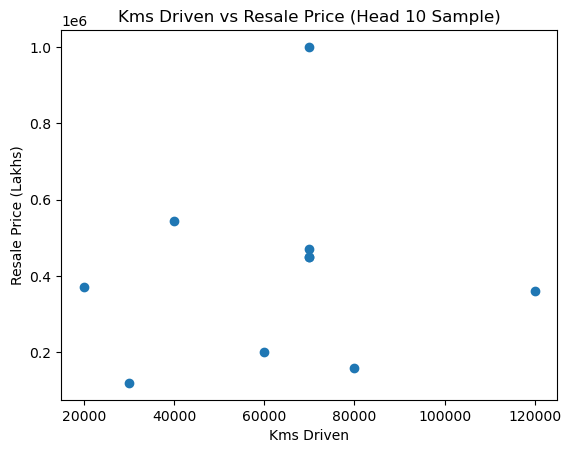

In [52]:
import matplotlib.pyplot as plt

sample_df = df.head(10)

plt.figure()
plt.scatter(sample_df['kms_driven'], sample_df['resale_price'])
plt.xlabel("Kms Driven")
plt.ylabel("Resale Price (Lakhs)")
plt.title("Kms Driven vs Resale Price (Head 10 Sample)")
plt.show()
